In [11]:
'''
 * The Recognize Anything Plus Model (RAM++)
 * Written by Xinyu Huang
'''
import argparse
import numpy as np
import random
import matplotlib.pyplot as plt

import torch

from PIL import Image
from ram.models import ram_plus
from ram import inference_ram as inference
from ram import get_transform

In [4]:
# Set hyper params
pretrained = 'pretrained/ram_plus_swin_large_14m.pth'
image_size = 384

In [5]:
# Load the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = ram_plus(pretrained=pretrained,
                            image_size=image_size,
                            vit='swin_l')
print(f'No. of params: {sum(p.numel() for p in model.parameters()):,}')

model.eval()

model = model.to(device)

--------------
pretrained/ram_plus_swin_large_14m.pth
--------------
load checkpoint from pretrained/ram_plus_swin_large_14m.pth
vit: swin_l
No. of params: 329,493,046


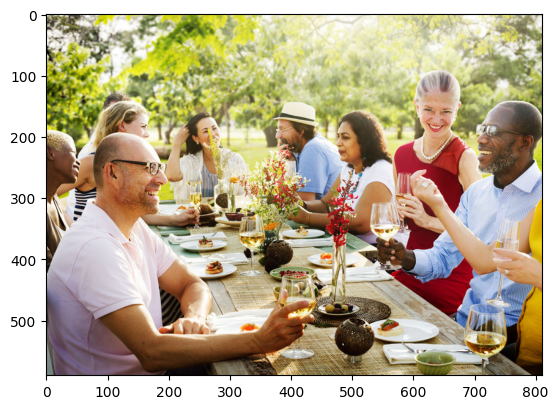

Image Tags: 


['table',
 'dinner party',
 'dinning table',
 'drink',
 'food',
 'gathering',
 'wine',
 'person',
 'individual',
 'meal',
 'outdoor',
 'picnic table',
 'platter',
 'sit',
 'wine glass']

In [16]:
# Transform the input image
image = 'img/demo2.jpg'
plt.imshow(Image.open(image))
plt.show()
transform = get_transform(image_size=image_size)
image = transform(Image.open(image)).unsqueeze(0).to(device)

# Run the model
res = inference(image, model)
image_tags = res[0].split(' | ')
print("Image Tags: ")
image_tags
# print("图像标签: ", res[1])